In [7]:
import sys
import os
import shutil
from py import analysis
import matplotlib
import numpy as np

from matplotlib import pyplot as plt
# %matplotlib notebook
%load_ext autoreload
%autoreload 2


cwd=os.getcwd()
cwd='/home/agoga/topcon'
# fc = FileChooser(cwd)
# display(fc)

folder='/sandbox/'
folder='/output-farm/CreateSiOx-x1_5-60234780-S/'

folder='/test/'
f=cwd+folder
folderpath=os.path.join(cwd,f)


f=cwd+folder+"png/"
outFolder=os.path.join(cwd,f)

print(folderpath)




ModuleNotFoundError: No module named 'ovito'

In [23]:
from pathlib import Path

path="/home/adam/code/topcon-md/data/TOPCon-Structs/out-structs-1.7-07-22-23/"
mk_str=""
for d in Path(path).glob('*.dat'):
        file=str(d).split('/')[-1]
        mk_str+=f"sbatch farm-run-createdat.sh data/starting_neb_files/{file} && "

print(mk_str)
        

sbatch farm-run-createdat.sh data/starting_neb_files/1.7-276.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-145.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-181.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-378.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-44.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-64.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-602.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-126.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-453.dat && sbatch farm-run-createdat.sh data/starting_neb_files/1.7-117.dat && 


In [6]:
# folder='/test/'
# f=cwd+folder
# folderpath=os.path.join(cwd,f)
# e=analysis.bondAnalysis(folderpath,True)

# folder='/output-farm/CreateSiOx-x1_5-60234780-S/'

# f=cwd+folder
# folderpath=os.path.join(cwd,f)
# e=analysis.bondAnalysis(folderpath,True)
data_folder="/home/adam/code/topcon-md/testing_reax/data/"
 
folderpath='/home/adam/code/topcon-md/data/neb/1.6-143.dat'

folderpath=data_folder+"csi_3x3_4h.dat"
# f=cwd+folder
# folderpath=os.path.join(cwd,f)
e=analysis.bondAnalysis(folderpath,True)

NameError: name 'analysis' is not defined

In [1]:
folder='output-farm/with-v-without-h-SiO_1-5/awoh1-SlowAnneal-FARM-59700804-S'

f=cwd+folder
folderpath=os.path.join(cwd,f)

coordList=[0,1,2,3,4]
Tstart=1000
Tcur=Tstart
len=30
labelList=[]
# for i in np.arange(0,len,1):
#     labelList.append((i*8,str(Tcur)+'K'))
#     Tcur=Tcur+25


title='Slow anneal'
e=analysis.coordinationTimeseries(folderpath,coordList,labelList,title)

NameError: name 'cwd' is not defined

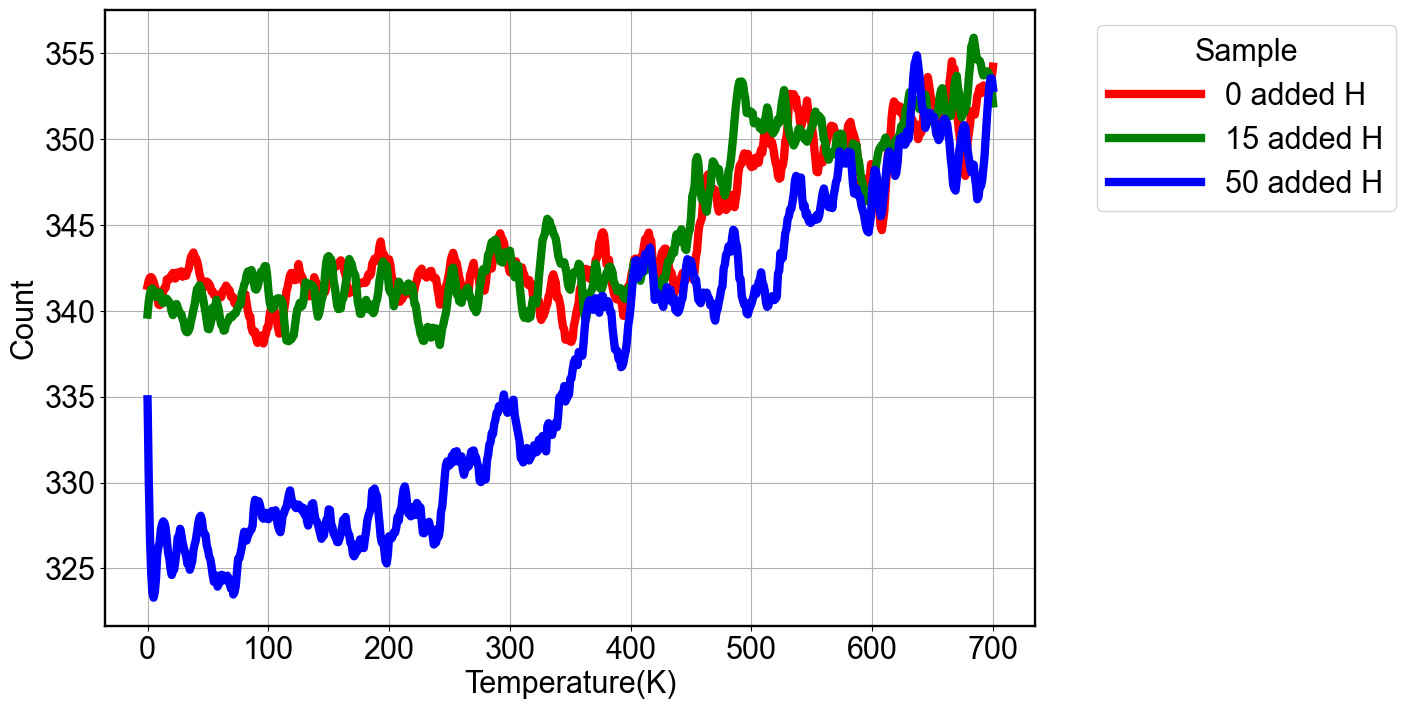

In [35]:
fff=['awoh1-SlowAnneal-FARM-59700804-S']#,'aw5h1-SlowAnneal-FARM-60138435-S']
#fff=['awoh5-SlowAnneal-FARM-59977903-S','aw3h5-SlowAnneal-FARM-60138430-S','aw5h5-SlowAnneal-FARM-60138431-S']
fff=['aw15h4-AnnealLoopSiOx-rw15h4-60422475-S']
fff=['AnnealLoopSiOx-law0h-60429681-S','AnnealLoopSiOx-law15h-60429702-S','AnnealLoopSiOx-law50h-60429703-S']#
folders=[]

for f in fff:
    #folders.append('output-farm/with-v-without-h-SiO_1-5/'+f)
    folders.append('output-farm/'+f)
# f=cwd+folder
# folderpath=os.path.join(cwd,f)

coordList=[4]
Tstart=1000
Tcur=Tstart
len=30
labelList=[]
# for i in np.arange(0,len,1):
#     labelList.append((i*8,str(Tcur)+'K'))
#     Tcur=Tcur+25


#https://www.ovito.org/forum/topic/coordination-number-with-different-thresholds-for-different-particle-types/

plt.style.use('seaborn-v0_8-deep')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['mediumblue', 'crimson','darkgreen', 'darkorange','crimson', 'darkorchid'])
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['axes.linewidth'] = 1.7
plt.rcParams['lines.linewidth'] = 6.0
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] =  'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['mathtext.default'] = 'regular'

title=''
e=analysis.coordinationTimeseries(folders,coordList,500,labelList,title)

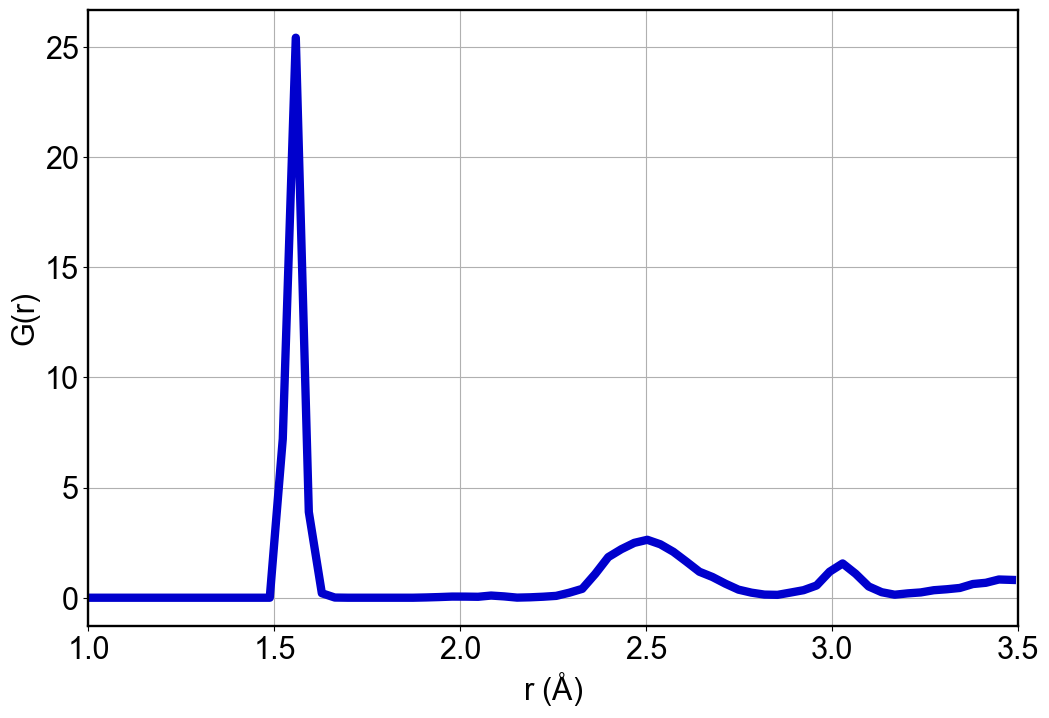

In [53]:
from ovito.io import import_file
from ovito.modifiers import CoordinationAnalysisModifier

# Load input data.
#pipeline = import_file("/home/agoga/topcon/sandbox/SiO2-nvtAnneal.data")
pipeline = import_file("/home/agoga/topcon/output-farm/vanDuinSilicaAnneal-FARM-56906707-S/SiO2-nptCycle.data")


# Print the list of input particle types.
# They are represented by ParticleType objects attached to the 'Particle Type' particle property.
# for t in pipeline.compute().particles.particle_types.types:
#     print("Type %i: %s" % (t.id, t.name))

# Calculate partial RDFs:
pipeline.modifiers.append(CoordinationAnalysisModifier(cutoff=3.5, number_of_bins=100, partial=False))

# Access the output DataTable:
rdf_table = pipeline.compute().tables['coordination-rdf']

# The y-property of the data points of the DataTable is now a vectorial property.
# Each vector component represents one partial RDF.
rdf_names = rdf_table.y.component_names

# Print a list of partial g(r) functions.
# for component, name in enumerate(rdf_names):
#     print("g(r) for pair-wise type combination %s:" % name)
#     print(rdf_table.y[:,component])
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['mediumblue', 'crimson','darkgreen', 'darkorange','crimson', 'darkorchid'])
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['axes.linewidth'] = 1.7
plt.rcParams['lines.linewidth'] = 6.0
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] =  'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['mathtext.default'] = 'regular'

plt.ylabel('G(r)')
plt.xlabel('r ($\AA$)')

plt.xlim(left=1,right=3.5)
# The DataTable.xy() method yields everthing as one combined NumPy table.
# This includes the 'r' values in the first array column, followed by the
# tabulated g(r) partial functions in the remaining columns. 
plt.plot(rdf_table.xy()[:,0],rdf_table.xy()[:,1])
